## Variance-Analysis of DAX-Priceindex, S&P500, FTSE100, SMI und STOXX Europe600

As consecutive part of the WACC and more detailed the CAPM research endevaours, I pursue to dig deeper into the risk building methodologies behind the CAPM. To be precise, I follow a Top-down approach to derive insights and justifications for stable or even slightly increasing minimium required rate of returns. 

**Description**:
- All time series datasets have one thing in common — time.
- Against the background of the widely accepted status quo that risk and uncertainty has increased in the context of financial markets & investments, I verify this risk posture using time series analysis principles.
- Particularly, I apply time series analysis to the historical closing prices of DAX30, S&P500 and Nikkei225 indices.

_________________________
**TSA-Principles**:
- To make sense of time series data, it has to be collected over time in the same intervals.
- To analyze time series data you have to understand the two fundamental concepts in time series — ***trend and seasonality***.
- ***Trend*** represents the general movement over time 
- ***Seasonality*** represents changes in behavior in the course of a single season
- ***Residual*** component shows everything not captured by combining trend and seasonality.
- ***Resampling***: If you have data collected in hourly intervals but need daily totals for the analysis, resampling is the way to go.
- ***Shifting***: The `shift()` function is Pandas is used to, well, shift the entire series up or down by the desired number of periods.
- ***Rolling***: Time series data in original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages is a useful technique for smoothing time series data.
- ***Differencing***: It is an essential technique when working with financial data (e.g., stock prices), and you want to calculate returns.

________________________
**Logarithmic charting**:
- The linear scale measures the daily change in the index's absolute value, which has become larger with time, rather than daily changes in relative, or percentage, terms.
- Part of the reason for this distortion is inflation.
- A logarithmic, or log, scale gives equal visual weight to equal relative changes: a 10% move looks the same whether it is from a high or a low base.
- Further, with log scales, series experiencing exponential growth appear as straight lines, making charts easier to interpret.

_________________________
**Indices Analysis Approach**:
- The first step is to web scrape the financial market data from yahoo.finance.com using the package `yfinance`.
- Then the datasets are cleaned & transformed in a way that they only contain relevant values.
- In a third step, the closing prices of each index is plotted as the original value and as a transformed log-value.
- The fourth step covers the quantification of risk measured as the variation of interval-to-interval prices.
- To make the magnitude of early variations

### 1) Data Preprocessing

**Data import using yfinance**

In [ ]:
# Install yfinance package #####################################################
!pip install yfinance

In [ ]:

# Load Packages ################################################################
import yfinance as yf
from datetime import datetime

# Load Data for DAXKurs, S&P500, FTSE100, SMI, STOXX Europe600 #################
dax_data = yf.Ticker("^GDAXIP")
sp_data = yf.Ticker("^GSPC")
ftse_data = yf.Ticker("^FTSE")
smi_data = yf.Ticker("^SSMI")
stoxx_data = yf.Ticker("^STOXX")

# Optional end_date set to today() if start is specified #######################
end_date = datetime(2021, 10, 26)

# Get historical prices for indices starting at 2004-01-04 #####################
#dax = dax_data.history(start = "2000-01-04", end = end_date)
sp = sp_data.history(start = "2000-01-04", end = end_date)
ftse = ftse_data.history(start = "2000-01-04", end = end_date)
smi = smi_data.history(start = "2000-01-04", end = end_date)
#stoxx = stoxx_data(start = "2004-04-27", end = end_date)

# Inspect first rows & structure of each dataframe #############################
#print(dax["Close"].head(), dax.shape)
print(sp["Close"].tail(), sp.shape)
print(ftse["Close"].tail(), ftse.shape)
print(smi["Close"].tail(), smi.shape)
#print(stoxx["Close"].head(), stoxx.shape)




Date
2021-10-19    4519.629883
2021-10-20    4536.189941
2021-10-21    4549.779785
2021-10-22    4544.899902
2021-10-25    4566.479980
Name: Close, dtype: float64 (5488, 7)
Date
2021-10-19    7217.500000
2021-10-20    7223.100098
2021-10-21    7190.299805
2021-10-22    7204.600098
2021-10-25    7222.799805
Name: Close, dtype: float64 (5512, 7)
Date
2021-10-19    11942.740234
2021-10-20    12013.150391
2021-10-21    12039.139648
2021-10-22    12056.209961
2021-10-25    12063.169922
Name: Close, dtype: float64 (5476, 7)


**Import of DAX-Priceindex and STOXX Europe600**

DAX price index and STOX Europe600 are not completely mapped to 2000-01-01 on yahoo.finance. Therefore the data import is done via a .csv file.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

In [ ]:
# Import der Datasets
# DAX-Kurs
daxkurs = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GitHub/00_Repo_Phd-Analysen/(2)_DAX_Kursindex_Zeitreihen-Analyse/01_Datensätze/DAX_KursIndex.csv", 
                      error_bad_lines= False, parse_dates= ["Datum"], sep = ";", decimal= ",", index_col = ["Datum"])
print(daxkurs.head(), daxkurs.shape)

# STOXX Europe600
stoxx = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GitHub/00_Repo_Phd-Analysen/(2)_DAX_Kursindex_Zeitreihen-Analyse/01_Datensätze/STOXX_Europe600.csv",
                    error_bad_lines = False, parse_dates = ["Datum"], sep = ";", decimal = ",", index_col = ["Datum"])

print(stoxx.head(), stoxx.shape)

               Schluss
Datum                 
  03.01.2000  5.248,12
  04.01.2000  5.120,77
  05.01.2000  5.054,78
  06.01.2000  5.033,67
  07.01.2000  5.271,59 (5538, 1)
              Eroeffnung    Hoch    Tief  Schluss Volumen
Datum                                                    
  03.01.2000      378.94  384.42  377.45   377.69       0
  04.01.2000      377.18  377.18  361.46   362.70       0
  05.01.2000      362.04  362.04  351.74   353.74       0
  06.01.2000      353.91  355.27  349.67   352.21       0
  07.01.2000      352.25  360.23  352.25   359.75       0 (5577, 5)


**Data trimming**

In [ ]:
# Trim dataframe size to only closed price ###################################
daxkurs = daxkurs[["Schluss"]]
sp = sp[["Close"]]
ftse = ftse[["Close"]]
smi = smi[["Close"]]
stoxx = stoxx[["Schluss"]]

In [ ]:
sp = sp.rename(columns = {"Close": "Schluss"})
ftse = ftse.rename(columns = {"Close": "Schluss"})
smi = smi.rename(columns = {"Close": "Schluss"})

In [ ]:
# Check for NaN values in daxkurs and stoxx

print(f"NaN-Values in DAX-Kursindex {daxkurs.isna().sum()}\n") 
print(f"NaN-Values in S&P500 {sp.isna().sum()}\n")
print(f"NaN-Values in FTSE100 {ftse.isna().sum()}\n")
print(f"NaN-Values in SMI {smi.isna().sum()}\n")
print(f"NaN-Values in STOXX Europe600 {stoxx.isna().sum()}")

NaN-Values in DAX-Kursindex Schluss    1
dtype: int64

NaN-Values in S&P500 Schluss    0
dtype: int64

NaN-Values in FTSE100 Schluss    0
dtype: int64

NaN-Values in SMI Schluss    0
dtype: int64

NaN-Values in STOXX Europe600 Schluss    1
dtype: int64


In [ ]:
# Remove NaN-Values
daxkurs = daxkurs.dropna()
stoxx = stoxx.dropna()

**Formatting the "Schluss"-column**

In [ ]:
daxkurs.head(3)

,Schluss
Datum,
03.01.2000,"5.248,12"
04.01.2000,"5.120,77"
05.01.2000,"5.054,78"


In [ ]:
# Change "Schluss"-type into integers
daxkurs["Schluss"] = daxkurs["Schluss"].str.replace("[\.\,]", "").astype(int)

# Divide by 100
daxkurs["Schluss"] = [x / 100 for x in daxkurs["Schluss"]]

daxkurs.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Schluss
Datum,
03.01.2000,5248.12
04.01.2000,5120.77
05.01.2000,5054.78


In [ ]:
stoxx.head(3)

,Schluss
Datum,
03.01.2000,377.69
04.01.2000,362.70
05.01.2000,353.74


Format of STOXX Europe600 is suited for further data manipulation

**Index Type-Transformation**

In [ ]:
# Check dtypes of all 5 Indices
daxkurs.index.dtype, sp.index.dtype, ftse.index.dtype, smi.index.dtype, stoxx.index.dtype

(dtype('O'), dtype('<M8[ns]'), dtype('<M8[ns]'), dtype('<M8[ns]'), dtype('O'))

In [ ]:
# Transform daxkurs index into datetimeIndex
daxkurs.index = pd.to_datetime(daxkurs.index, errors = "coerce", dayfirst = True)
print(f"daxkurs.head: {daxkurs.head(3)},\ndaxkurs.tail:\n{daxkurs.tail(3)},\ndaxkurs.type:{type(daxkurs.index)}")

daxkurs.head:             Schluss
Datum              
2000-01-03  5248.12
2000-01-04  5120.77
2000-01-05  5054.78,
daxkurs.tail:
            Schluss
Datum              
2021-10-21  6537.87
2021-10-22  6567.63
2021-10-25  6591.40,
daxkurs.type:<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
# Transform stoxx index into datetimeIndex
stoxx.index = pd.to_datetime(stoxx.index, errors = "coerce", dayfirst = True)
print(f"stoxx.head:\n{stoxx.head(3)}\n, \nstoxx.tail:\n{stoxx.tail(3)}\n, \nstoxx.type:\n{type(stoxx.index)}")

stoxx.head:
            Schluss
Datum              
2000-01-03   377.69
2000-01-04   362.70
2000-01-05   353.74
, 
stoxx.tail:
            Schluss
Datum              
2021-10-21   469.71
2021-10-22   471.88
2021-10-25   472.21
, 
stoxx.type:
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


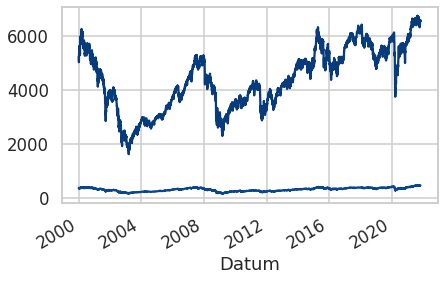

In [ ]:
import matplotlib.pyplot as plt 
daxkurs["Schluss"].plot();
stoxx["Schluss"].plot();


**Merge data to on data-frame**

In [ ]:
data = [daxkurs["Schluss"], sp["Schluss"], ftse["Schluss"], smi["Schluss"], stoxx["Schluss"]]

keys = ["DAX-Kurs", "S&P500", "FTSE100", "SMI", "STOXX-Europe600"]

indices = pd.concat(data, axis = 1, keys = keys, ignore_index = False)
indices = indices[1:]
indices.head(), indices.tail(), indices.shape

(            DAX-Kurs       S&P500      FTSE100          SMI  STOXX-Europe600
 2000-01-04   5120.77  1399.420044  6665.899902  7268.100098           362.70
 2000-01-05   5054.78  1402.109985  6535.899902  7181.299805           353.74
 2000-01-06   5033.67  1403.449951  6447.200195  7280.600098           352.21
 2000-01-07   5271.59  1441.469971  6504.799805  7448.000000           359.75
 2000-01-10   5383.97  1457.599976  6607.700195  7452.799805           365.39,
             DAX-Kurs       S&P500      FTSE100           SMI  STOXX-Europe600
 2021-10-19   6556.16  4519.629883  7217.500000  11942.740234           468.58
 2021-10-20   6559.15  4536.189941  7223.100098  12013.150391           470.07
 2021-10-21   6537.87  4549.779785  7190.299805  12039.139648           469.71
 2021-10-22   6567.63  4544.899902  7204.600098  12056.209961           471.88
 2021-10-25   6591.40  4566.479980  7222.799805  12063.169922           472.21,
 (5632, 5))

In [ ]:
indices["DAX-Kurs"].isna().sum()

96

### 2) Data Transformation

In financial markets, participants demand a premium for every risk attached to a particular asset they want to invest in. Risk is widely defined as the level of uncertainty which needs to be priced in order to define an investor's minimum required rate of return as decision criteria of the investment.

To measure or price the risk, the variance seems to be a good fit. In order to focus on the short-term (but not too short-term!) variance, I decided to compute the Variance on rolling window of 30 days. I conduct this analysis for the original price as well as for the price after logarithmic transformation.

**Data Transformation: Logarithmization**

Logarithmization of closing prices to eliminate multiplicative factors when dealing with time series

In [ ]:
# Copy indices dataframe
indices_log = indices.copy()

# Iterate through every column and apply np.log to values
for column in indices_log:
  indices_log[column] = np.log(indices_log[column])

indices_log.head()

,DAX-Kurs,S&P500,FTSE100,SMI,STOXX-Europe600
2000-01-04,8.541060,7.243813,8.804760,8.891250,5.893576
2000-01-05,8.528090,7.245734,8.785065,8.879236,5.868562
2000-01-06,8.523905,7.246689,8.771401,8.892969,5.864228
2000-01-07,8.570087,7.273419,8.780296,8.915701,5.885409
2000-01-10,8.591181,7.284547,8.795991,8.916345,5.900965


**Data Transformation: Differencing**

In [ ]:
# Copy indices dataframe
indices_diff = indices.copy()

# Iterate through every column and perform .diff() on indices
for column in indices_diff:
  indices_diff[column] = indices[column].diff()

# Drop NaN-Values
indices_diff = indices_diff.dropna()
indices_diff.head()

,DAX-Kurs,S&P500,FTSE100,SMI,STOXX-Europe600
2000-01-05,-65.99,2.689941,-130.000000,-86.800293,-8.96
2000-01-06,-21.11,1.339966,-88.699707,99.300293,-1.53
2000-01-07,237.92,38.020020,57.599609,167.399902,7.54
2000-01-10,112.38,16.130005,102.900391,4.799805,5.64
2000-01-11,-26.64,-19.039917,-88.800293,-32.699707,-2.46


**Data Transformation: Log-Differencing**

In [ ]:
# Copy indices dataframe
indices_diff_log = indices_log.copy()

# Iterate through every column and perform .diff() method
for column in indices_diff_log:
  indices_diff_log[column] = indices_diff_log[column].diff()

# Remove NaN-Values
indices_diff_log = indices_diff_log.dropna()
indices_diff_log.head()

,DAX-Kurs,S&P500,FTSE100,SMI,STOXX-Europe600
2000-01-05,-0.012970,0.001920,-0.019695,-0.012015,-0.025014
2000-01-06,-0.004185,0.000955,-0.013664,0.013733,-0.004335
2000-01-07,0.046183,0.026730,0.008894,0.022732,0.021182
2000-01-10,0.021094,0.011128,0.015695,0.000644,0.015556
2000-01-11,-0.004960,-0.013149,-0.013530,-0.004397,-0.006755


**Data Transformation: Price-Variance**

In [ ]:
indices_diff_var = indices_diff.copy()

In [ ]:
for column in indices_diff_var:
  indices_diff_var[column] = indices_diff_var[column].rolling(window = 30).var()

indices_diff_var = indices_diff_var.dropna()

indices_diff_var.head()

,DAX-Kurs,S&P500,FTSE100,SMI,STOXX-Europe600
2000-02-17,11773.094484,348.579005,7633.094848,8199.188694,22.314579
2000-02-18,11500.789941,407.218897,7169.260337,7968.643105,19.122359
2000-02-23,11455.816936,410.360208,7529.627540,7724.972246,19.457920
2000-02-24,10136.516537,355.933550,7513.846023,6749.715062,18.042359
2000-02-25,9946.686817,352.346075,7578.009879,6808.961350,18.782570


**Data Transformation: Logarithmic Price-Variance**

In [ ]:
indices_log_diff_var = indices_diff_log.copy()

In [ ]:
for column in indices_log_diff_var:
  indices_log_diff_var[column] = indices_log_diff_var[column].rolling(window = 20).var()

indices_log_diff_var = indices_log_diff_var.dropna()
indices_log_diff_var.head()

,DAX-Kurs,S&P500,FTSE100,SMI,STOXX-Europe600
2000-02-03,0.000410,0.000201,0.000148,0.000190,0.000185
2000-02-04,0.000391,0.000201,0.000153,0.000183,0.000143
2000-02-07,0.000423,0.000201,0.000150,0.000174,0.000147
2000-02-08,0.000381,0.000172,0.000186,0.000145,0.000148
2000-02-09,0.000369,0.000187,0.000173,0.000152,0.000141


### 3) Visualising the Index development (original & logarithmic)

Because the financial markets performances are expontially increasing, I will add a log-scale to make earlier variations in prices more visible.

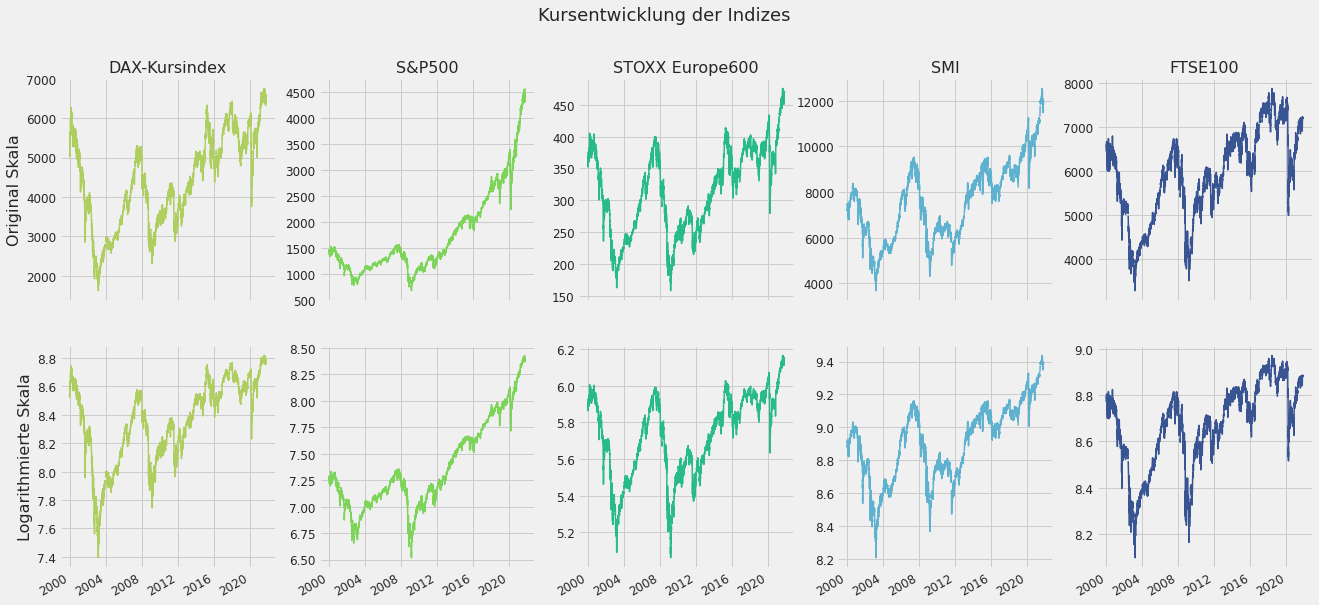

In [ ]:
# Load packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot structure & style
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(nrows = 2, ncols = 5, sharex = True, figsize = (20, 10))

#Plot Indices original - values
indices["DAX-Kurs"].plot(ax = ax[0,0], linewidth = 1.5, color = "#AFCE60")
indices["S&P500"].plot(ax = ax[0,1], linewidth = 1.5, color = "#7CD559")
indices["STOXX-Europe600"].plot(ax = ax[0,2], linewidth = 1.5, color = "#27BB8A")
indices["SMI"].plot(ax = ax[0,3], linewidth = 1.5, color = "#5FB2CF")
indices["FTSE100"].plot(ax = ax[0,4], linewidth = 1.5, color = "#385492")

# Plot indices logarithmic - values 
indices_log["DAX-Kurs"].plot(ax = ax[1,0], linewidth = 1.5, color = "#AFCE60")
indices_log["S&P500"].plot(ax = ax[1,1], linewidth = 1.5, color = "#7CD559")
indices_log["STOXX-Europe600"].plot(ax = ax[1,2], linewidth = 1.5, color = "#27BB8A")
indices_log["SMI"].plot(ax = ax[1,3], linewidth = 1.5, color = "#5FB2CF")
indices_log["FTSE100"].plot(ax = ax[1,4], linewidth = 1.5, color = "#385492")

# Set title and axes labels
ax[0,0].set_title("DAX-Kursindex", fontsize = 16)
ax[0,1].set_title("S&P500", fontsize = 16)
ax[0,2].set_title("STOXX Europe600", fontsize = 16)
ax[0,3].set_title("SMI", fontsize = 16)
ax[0,4].set_title("FTSE100", fontsize = 16)

ax[0,0].tick_params(axis = "both", labelsize = 12)
ax[0,1].tick_params(axis = "both", labelsize = 12)
ax[0,2].tick_params(axis = "both", labelsize = 12)
ax[0,3].tick_params(axis = "both", labelsize = 12)
ax[0,4].tick_params(axis = "both", labelsize = 12)
ax[1,0].tick_params(axis = "both", labelsize = 12)
ax[1,1].tick_params(axis = "both", labelsize = 12)
ax[1,2].tick_params(axis = "both", labelsize = 12)
ax[1,3].tick_params(axis = "both", labelsize = 12)
ax[1,4].tick_params(axis = "both", labelsize = 12)

ax[0,0].set_ylabel("Original Skala", fontsize = 16)
ax[1,0].set_ylabel("Logarithmierte Skala", fontsize = 16)

fig.suptitle("Kursentwicklung der Indizes", fontsize = 18)

plt.show()

**Interpretation**:
- Logarthimic charting facilitates interpretation cababilites in a way that multiplicative factors are depicted linearly. Thus variations are easier to be identified
- Since 2009, the S&P500 shows the most constantly increasing performance compared to DAX30 and Nikkei225
- From a value generation perspective, an investor holding some ETF of the S&P500 has quadrupled its invest, while the prices for DAX30 and Nikkei225 only tripled during the same time frame

### 4) Visualising before and after "Differencing"-Transformation

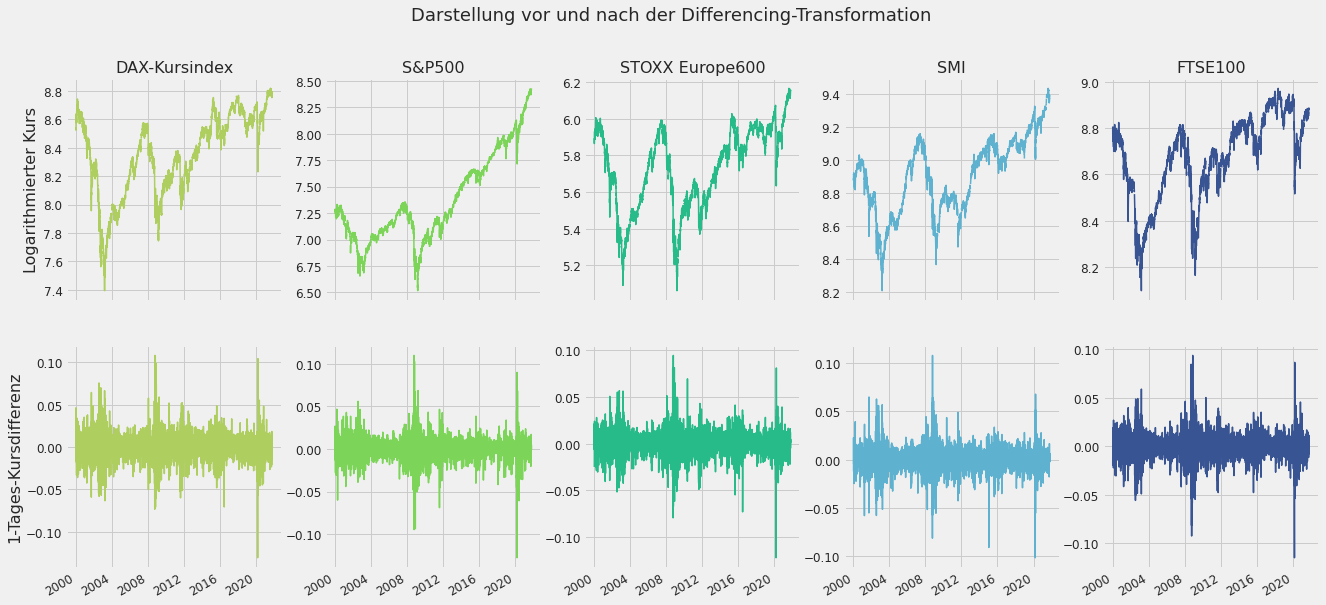

In [ ]:
# Load packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot structure & style
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(nrows = 2, ncols = 5, sharex = True, figsize = (20, 10))

#Plot Indices original - values
indices_log["DAX-Kurs"].plot(ax = ax[0,0], linewidth = 1.5, color = "#AFCE60")
indices_log["S&P500"].plot(ax = ax[0,1], linewidth = 1.5, color = "#7CD559")
indices_log["STOXX-Europe600"].plot(ax = ax[0,2], linewidth = 1.5, color = "#27BB8A")
indices_log["SMI"].plot(ax = ax[0,3], linewidth = 1.5, color = "#5FB2CF")
indices_log["FTSE100"].plot(ax = ax[0,4], linewidth = 1.5, color = "#385492")

# Plot indices logarithmic - values 
indices_diff_log["DAX-Kurs"].plot(ax = ax[1,0], linewidth = 1.5, color = "#AFCE60")
indices_diff_log["S&P500"].plot(ax = ax[1,1], linewidth = 1.5, color = "#7CD559")
indices_diff_log["STOXX-Europe600"].plot(ax = ax[1,2], linewidth = 1.5, color = "#27BB8A")
indices_diff_log["SMI"].plot(ax = ax[1,3], linewidth = 1.5, color = "#5FB2CF")
indices_diff_log["FTSE100"].plot(ax = ax[1,4], linewidth = 1.5, color = "#385492")

# Set title and axes labels
ax[0,0].set_title("DAX-Kursindex", fontsize = 16)
ax[0,1].set_title("S&P500", fontsize = 16)
ax[0,2].set_title("STOXX Europe600", fontsize = 16)
ax[0,3].set_title("SMI", fontsize = 16)
ax[0,4].set_title("FTSE100", fontsize = 16)

ax[0,0].tick_params(axis = "both", labelsize = 12)
ax[0,1].tick_params(axis = "both", labelsize = 12)
ax[0,2].tick_params(axis = "both", labelsize = 12)
ax[0,3].tick_params(axis = "both", labelsize = 12)
ax[0,4].tick_params(axis = "both", labelsize = 12)
ax[1,0].tick_params(axis = "both", labelsize = 12)
ax[1,1].tick_params(axis = "both", labelsize = 12)
ax[1,2].tick_params(axis = "both", labelsize = 12)
ax[1,3].tick_params(axis = "both", labelsize = 12)
ax[1,4].tick_params(axis = "both", labelsize = 12)

ax[0,0].set_ylabel("Logarithmierter Kurs", fontsize = 16)
ax[1,0].set_ylabel("1-Tages-Kursdifferenz", fontsize = 16)

fig.suptitle("Darstellung vor und nach der Differencing-Transformation", fontsize = 18)

plt.show()

### 5) Compare Price-developments and Price-Variances

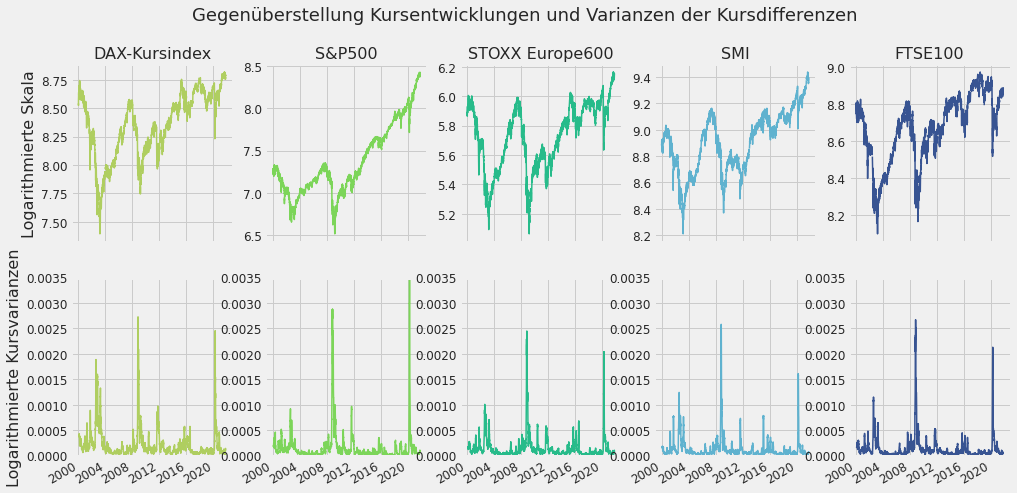

In [ ]:
# Load packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot structure & style
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(nrows = 2, ncols = 5, sharex = True, figsize = (15, 8))

#Plot Indices original - values
indices_log["DAX-Kurs"].plot(ax = ax[0,0], linewidth = 1.5, color = "#AFCE60")
indices_log["S&P500"].plot(ax = ax[0,1], linewidth = 1.5, color = "#7CD559")
indices_log["STOXX-Europe600"].plot(ax = ax[0,2], linewidth = 1.5, color = "#27BB8A")
indices_log["SMI"].plot(ax = ax[0,3], linewidth = 1.5, color = "#5FB2CF")
indices_log["FTSE100"].plot(ax = ax[0,4], linewidth = 1.5, color = "#385492")

# Plot indices logarithmic - values 
indices_log_diff_var["DAX-Kurs"].plot(ax = ax[1,0], linewidth = 1.5, color = "#AFCE60")
indices_log_diff_var["S&P500"].plot(ax = ax[1,1], linewidth = 1.5, color = "#7CD559")
indices_log_diff_var["STOXX-Europe600"].plot(ax = ax[1,2], linewidth = 1.5, color = "#27BB8A")
indices_log_diff_var["SMI"].plot(ax = ax[1,3], linewidth = 1.5, color = "#5FB2CF")
indices_log_diff_var["FTSE100"].plot(ax = ax[1,4], linewidth = 1.5, color = "#385492")

# Set title and axes labels
ax[0,0].set_title("DAX-Kursindex", fontsize = 16)
ax[0,1].set_title("S&P500", fontsize = 16)
ax[0,2].set_title("STOXX Europe600", fontsize = 16)
ax[0,3].set_title("SMI", fontsize = 16)
ax[0,4].set_title("FTSE100", fontsize = 16)

ax[0,0].tick_params(axis = "both", labelsize = 12)
ax[0,1].tick_params(axis = "both", labelsize = 12)
ax[0,2].tick_params(axis = "both", labelsize = 12)
ax[0,3].tick_params(axis = "both", labelsize = 12)
ax[0,4].tick_params(axis = "both", labelsize = 12)
ax[1,0].tick_params(axis = "both", labelsize = 12)
ax[1,1].tick_params(axis = "both", labelsize = 12)
ax[1,2].tick_params(axis = "both", labelsize = 12)
ax[1,3].tick_params(axis = "both", labelsize = 12)
ax[1,4].tick_params(axis = "both", labelsize = 12)

ax[0,0].set_ylabel("Logarithmierte Skala", fontsize = 16)
ax[1,0].set_ylabel("Logarithmierte Kursvarianzen", fontsize = 16)

ax[1,0].set_ylim([0, 0.0035])
ax[1,1].set_ylim([0, 0.0035])
ax[1,2].set_ylim([0, 0.0035])
ax[1,3].set_ylim([0, 0.0035])
ax[1,4].set_ylim([0, 0.0035])


fig.suptitle("Gegenüberstellung Kursentwicklungen und Varianzen der Kursdifferenzen", fontsize = 18)

plt.show()

### 6) Boxplots of Price-Variances

**Extracting years per row**


In [ ]:
indices_log_diff_var["Jahr"] = [x.year for x in indices_log_diff_var.index]
indices_log_diff_var.head()

,DAX-Kurs,S&P500,FTSE100,SMI,STOXX-Europe600,Jahr
2000-02-03,0.000410,0.000201,0.000148,0.000190,0.000185,2000
2000-02-04,0.000391,0.000201,0.000153,0.000183,0.000143,2000
2000-02-07,0.000423,0.000201,0.000150,0.000174,0.000147,2000
2000-02-08,0.000381,0.000172,0.000186,0.000145,0.000148,2000
2000-02-09,0.000369,0.000187,0.000173,0.000152,0.000141,2000


In [ ]:
# Sort Columns korrekt
indices_log_diff_var = indices_log_diff_var[["Jahr", "DAX-Kurs", "S&P500", "FTSE100", "SMI", "STOXX-Europe600"]]
indices_log_diff_var.head()

,Jahr,DAX-Kurs,S&P500,FTSE100,SMI,STOXX-Europe600
2000-02-03,2000,0.000410,0.000201,0.000148,0.000190,0.000185
2000-02-04,2000,0.000391,0.000201,0.000153,0.000183,0.000143
2000-02-07,2000,0.000423,0.000201,0.000150,0.000174,0.000147
2000-02-08,2000,0.000381,0.000172,0.000186,0.000145,0.000148
2000-02-09,2000,0.000369,0.000187,0.000173,0.000152,0.000141


In [ ]:
# Group by "Jahr"
indices_log_diff_var_mean = indices_log_diff_var.groupby(["Jahr"]).mean()
indices_log_diff_var_mean.head()

,DAX-Kurs,S&P500,FTSE100,SMI,STOXX-Europe600
Jahr,,,,,
2000,0.000221,0.000189,0.000141,0.000080,0.000130
2001,0.000311,0.000180,0.000176,0.000192,0.000192
2002,0.000629,0.000267,0.000304,0.000338,0.000321
2003,0.000424,0.000117,0.000167,0.000198,0.000189
2004,0.000102,0.000050,0.000043,0.000068,0.000054


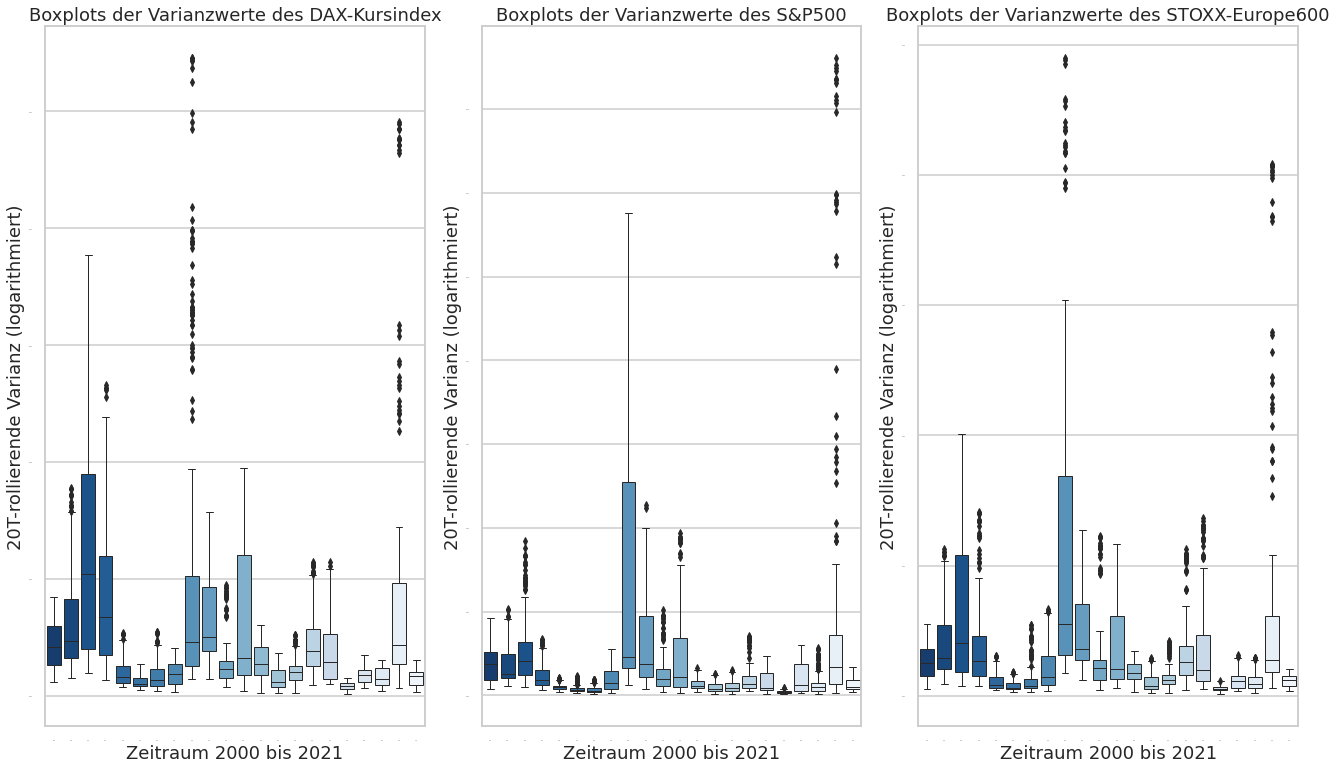

In [ ]:
import seaborn as sns

fig1, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,12), gridspec_kw = {"wspace": 0.15, "hspace": 0.5})

plt.style.use("seaborn-whitegrid")
sns.set_style("whitegrid")
sns.set_palette("Blues_r", n_colors = 22)
sns.set_context("talk")


#Indices_log_diff_var_mean["DAX-Kurs"].plot(linestyle = "--", linewidth = 10, color = "r")
dax_variances = sns.boxplot(ax = ax[0], x = "Jahr", y = "DAX-Kurs", data = indices_log_diff_var, linewidth = 1.0)
dax_variances.set(ylabel = "20T-rollierende Varianz (logarithmiert)", title= "Boxplots der Varianzwerte des DAX-Kursindex", xlabel = "Zeitraum 2000 bis 2021")
dax_variances.tick_params(axis = "both", labelsize = 0)

# Boxplots für Varianzwerte von Preisdifferenzen des S&P500
sp_variances = sns.boxplot(ax = ax[1], x = "Jahr", y = "S&P500", data = indices_log_diff_var, linewidth = 1.0)
sp_variances.set(ylabel = "20T-rollierende Varianz (logarithmiert)", title = "Boxplots der Varianzwerte des S&P500", xlabel = "Zeitraum 2000 bis 2021")
sp_variances.tick_params(axis = "both", labelsize = 0)

# Boxplots für Varianzwerte von Preisdifferenzen des STOXX Europe600
stoxx_variances = sns.boxplot(ax = ax[2], x = "Jahr", y = "STOXX-Europe600", data = indices_log_diff_var, linewidth = 1.0)
stoxx_variances.set(ylabel = "20T-rollierende Varianz (logarithmiert)", title = "Boxplots der Varianzwerte des STOXX-Europe600", xlabel = "Zeitraum 2000 bis 2021")
stoxx_variances.tick_params(axis = "both", labelsize = 0)



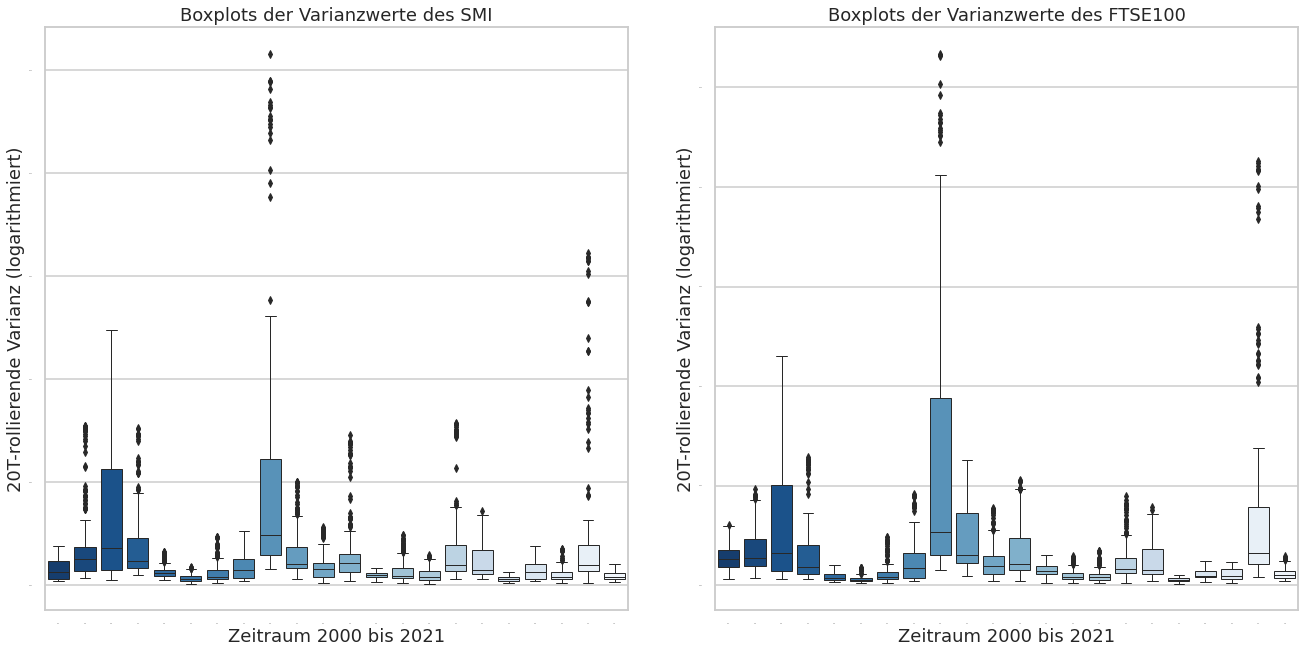

<Figure size 1152x576 with 0 Axes>

In [ ]:
import seaborn as sns

fig2, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10), gridspec_kw = {"wspace": 0.15, "hspace": 0.5})
plt.figure(figsize = (16,8))

plt.style.use("seaborn-whitegrid")
sns.set_style("whitegrid")
sns.set_palette("Blues_r", n_colors = 22)
sns.set_context("talk")


# Boxplots für Varianzwerte von Preisdifferenzen des SMI
smi_variances = sns.boxplot(ax = ax[0], x = "Jahr", y = "SMI", data = indices_log_diff_var, linewidth = 1.0)
smi_variances.set(ylabel = "20T-rollierende Varianz (logarithmiert)", title = "Boxplots der Varianzwerte des SMI", xlabel = "Zeitraum 2000 bis 2021")
smi_variances.tick_params(axis = "both", labelsize = 0)

# Boxplots für Varianzwerte von Preisdifferenzen des FTSE100
ftse_variances = sns.boxplot(ax = ax[1], x = "Jahr", y = "FTSE100", data = indices_log_diff_var, linewidth = 1.0)
ftse_variances.set(ylabel = "20T-rollierende Varianz (logarithmiert)", title = "Boxplots der Varianzwerte des FTSE100", xlabel = "Zeitraum 2000 bis 2021")
ftse_variances.tick_params(axis = "both", labelsize = 0);

